In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Задание

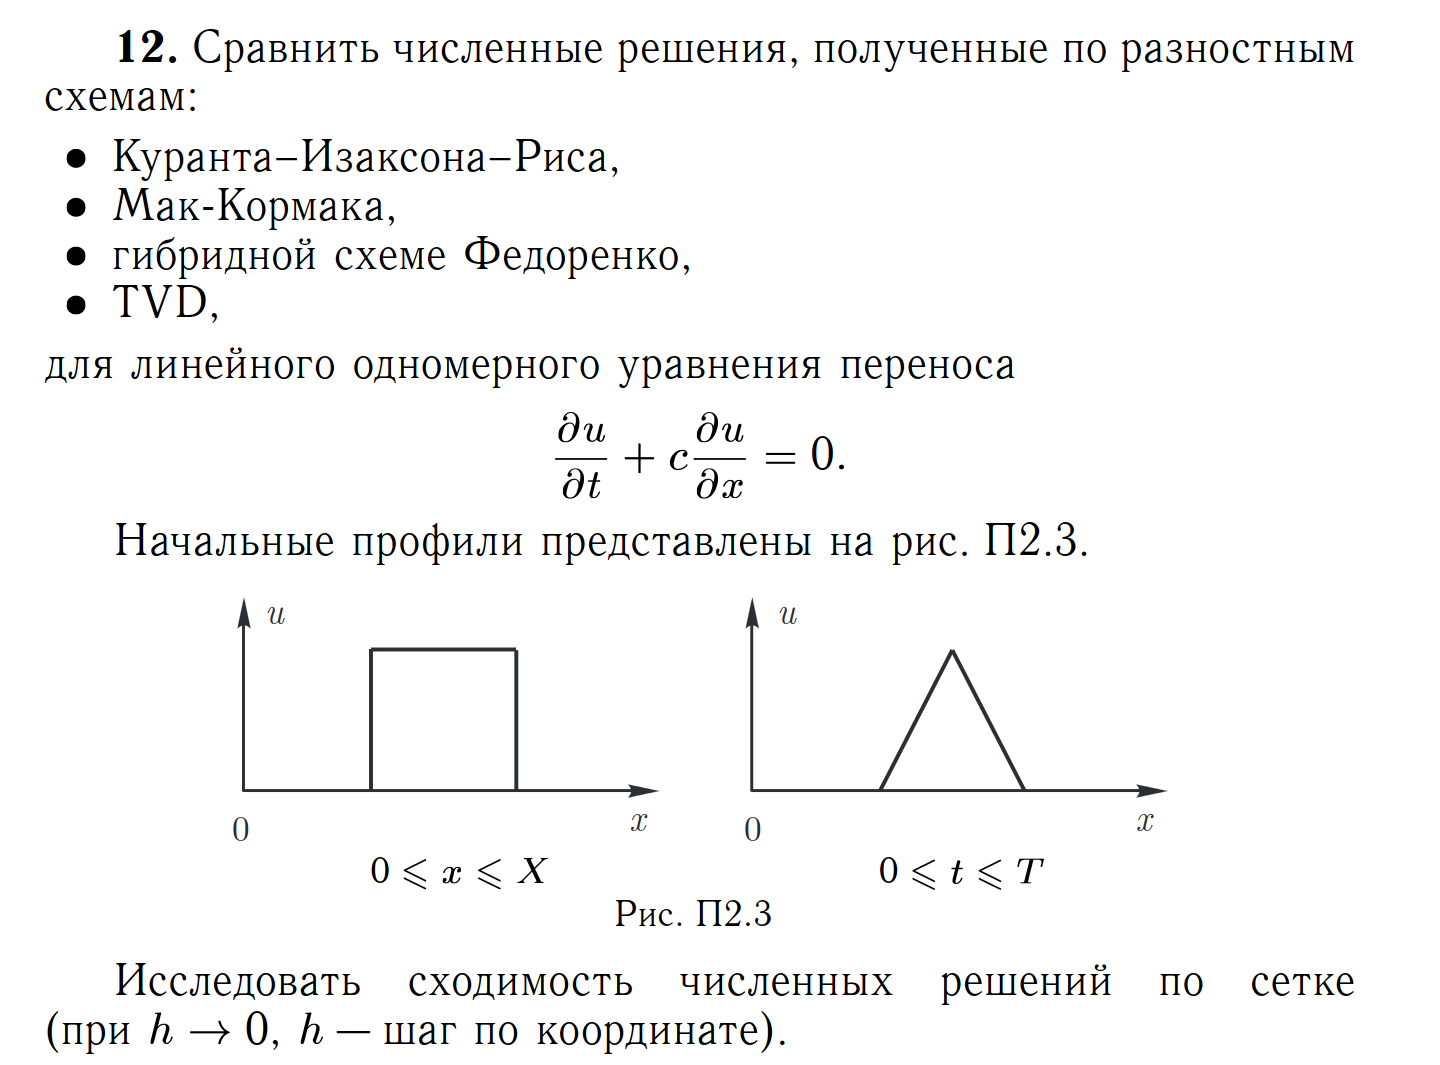

# Решение

In [2]:
# инициализация
c = 1

x_0_l, X, x_0_r = 0, 1, 10
t_0_l, T, t_0_r = 0, 1, 10

In [3]:
def func(f, N, K):
    """
    N - максимальное число шагов по х
    K - максимальное число шагов по t
    """
    h = (x_0_r - x_0_l) / N # шаг сетки по х
    t = (t_0_r - t_0_l) / K # шаг сетки по времени
    
    # зададим сетку
    x_i = np.arange(x_0_l, x_0_r, h) # значения в узлах по х
    t_j = np.arange(t_0_l, t_0_r, t) # значение в узлах по t
    r_j = len(t_j) # количество узлов по t
    r_i = len(x_i) # количество узлов по x
    u_h_t = np.zeros([r_j, r_i]) # итоговая сетка размером x_i*t_j
    
    u_x_0 = np.array(
        [1 if x_0_l <= x <= X else 0 for x in x_i]
    )
    u_0_t = np.array(
        [1 * t if t_0_l <= t <= (T - t_0_l) / 2 else (1 - 1 * t) if (T - t_0_l) / 2 < t <= T else 0 for t in t_j]
    )
    
    # начальные профили
    plt.figure(figsize=(8, 4))
    plt.plot(x_i, u_x_0) 
    plt.title('u(x, 0)')
    plt.xlabel('x')
    plt.ylabel('u')
    plt.show()
    
    plt.figure(figsize=(8, 4))
    plt.plot(t_j, u_0_t) 
    plt.title('u(0, t)')
    plt.xlabel('t')
    plt.ylabel('u')
    plt.show()
    
    # найдем значения на нулевом слое при t = 0 u_x_0 = ...
    u_h_t[0] = u_x_0
    
    # найдем значения u_h_t на первом и последующих слоях
    f(u_h_t, h, t)
    
    # результат
    print(u_h_t)
    
    plt.figure(figsize=(8, 4))
    plt.plot(x_i, u_h_t[r_j // 2]) 
    plt.title('u(x, t)')
    plt.xlabel('x')
    plt.ylabel('u')
    plt.show()

## Схема Куранта–Изаксона–Риса

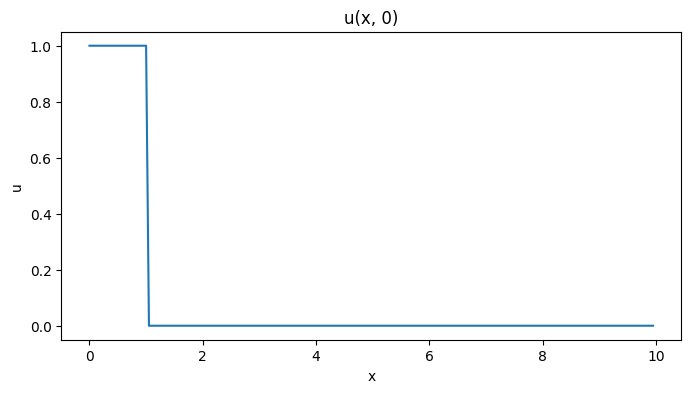

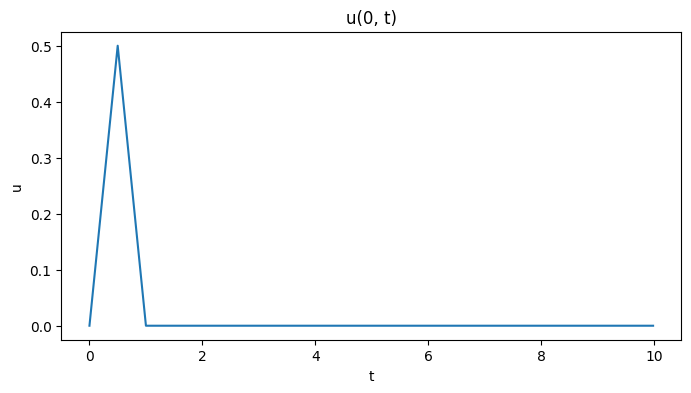

[[1.00000000e+000 1.00000000e+000 1.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [6.00000000e-001 1.00000000e+000 1.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [3.60000000e-001 8.40000000e-001 1.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 ...
 [5.51025174e-111 1.83124033e-108 3.03685280e-106 ... 4.33782274e-001
  4.65261286e-001 0.00000000e+000]
 [3.30615105e-111 1.10094830e-108 1.82943664e-106 ... 4.20993633e-001
  4.52669681e-001 0.00000000e+000]
 [1.98369063e-111 6.61891439e-109 1.10206578e-106 ... 4.08192303e-001
  4.39999262e-001 0.00000000e+000]]


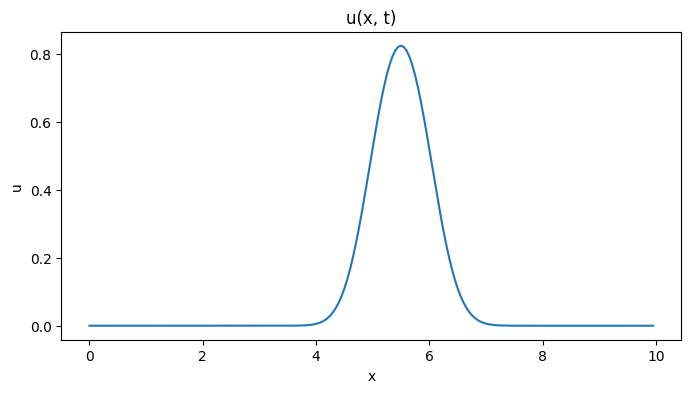

In [4]:
def f(u_h_t, h, t):
    const = -(c * t) / h 
    for j in range(len(u_h_t) - 1):
        for i in range(len(u_h_t[j]) - 1):
            u_h_t[j + 1, i] = u_h_t[j, i] + const * (u_h_t[j, i] - u_h_t[j, i - 1])

func(f, 200, 500)

## [Схема Мак-Кормака](https://en.m.wikipedia.org/wiki/MacCormack_method)

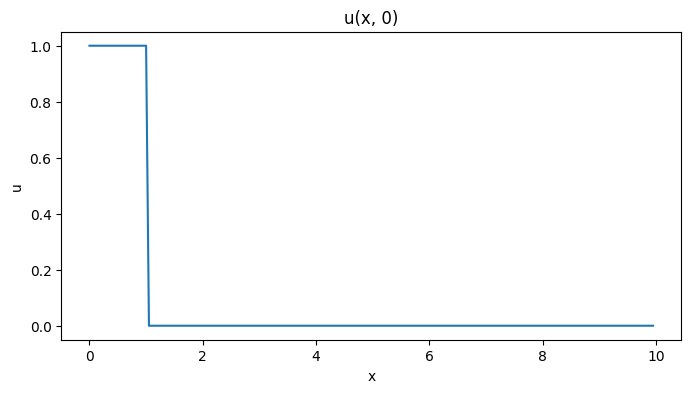

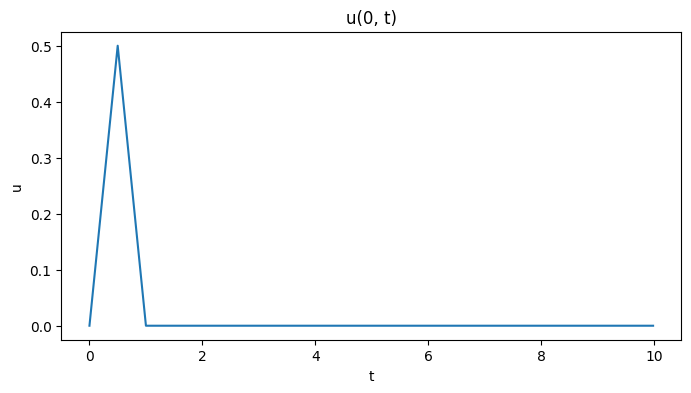

[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 8.00000000e-01  1.00000000e+00  1.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 6.16000000e-01  9.44000000e-01  1.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [-1.68641878e-23  8.73068197e-23  1.86964174e-22 ...  5.09753019e-01
   9.92862486e-01  0.00000000e+00]
 [-2.59918712e-23  4.61800551e-23  2.25509447e-22 ...  4.86911034e-01
   9.76735333e-01  0.00000000e+00]
 [-2.94541281e-23  4.45238873e-24  2.21616345e-22 ...  4.58813276e-01
   9.56792769e-01  0.00000000e+00]]


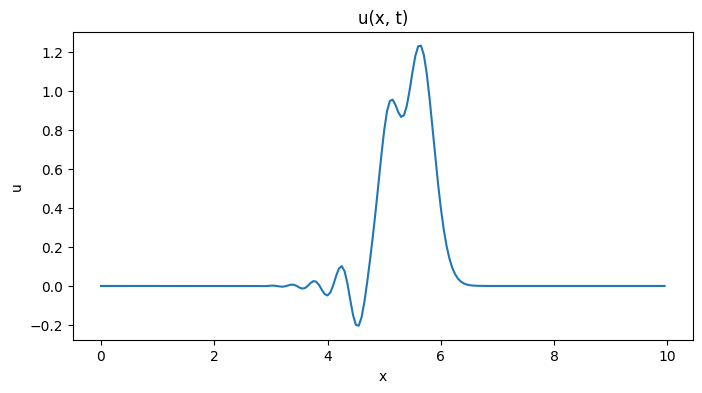

In [5]:
def f(u_h_t, h, t):
    const = -(c * t) / h 
    for j in range(len(u_h_t) - 1):
        # predictor
        u_p = np.copy(u_h_t[j])
        for i in range(len(u_h_t[j]) - 1):
            u_p[i] = u_h_t[j, i] + const * (u_h_t[j, i + 1] - u_h_t[j, i])

        # corrector
        for i in range(len(u_h_t[j]) - 1):
            u_h_t[j + 1, i] = (1/2)*(u_h_t[j, i] + u_p[i]) + (const/2)*(u_p[i] - u_p[i - 1])

func(f, 200, 500)

## [Гибридная схема Федоренко](http://crecs.ru/ru/numlabs2/Advect.html#_Toc190708223)

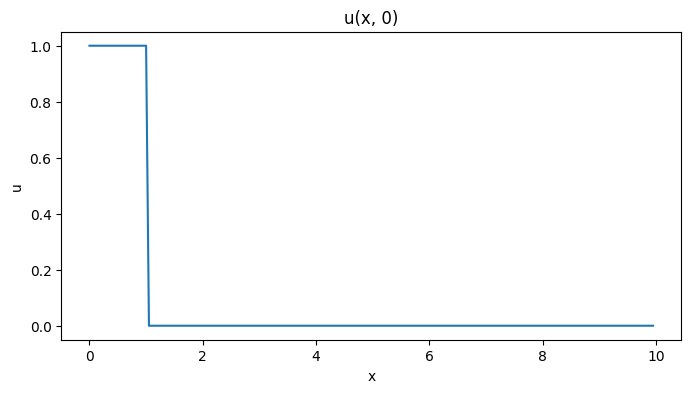

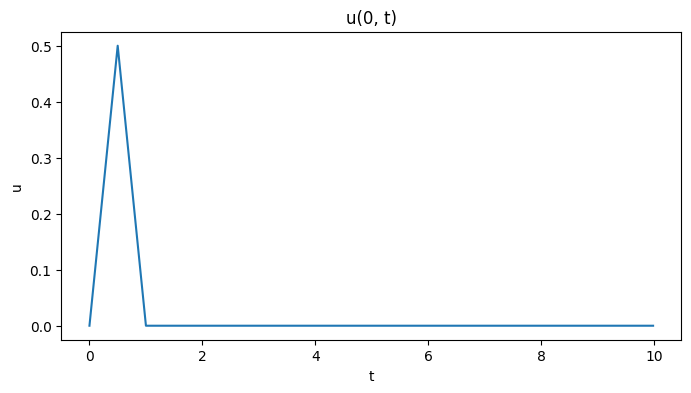

[[1.00000000e+000 1.00000000e+000 1.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [7.20000000e-001 1.00000000e+000 1.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [4.84800000e-001 9.21600000e-001 1.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 ...
 [1.25615572e-131 8.61226527e-131 9.38902517e-130 ... 6.16537998e-001
  6.91333127e-001 0.00000000e+000]
 [7.53693435e-132 5.66982145e-131 5.97790571e-130 ... 5.82842267e-001
  6.61415075e-001 0.00000000e+000]
 [4.52216061e-132 3.70337024e-131 3.81353629e-130 ... 5.47873719e-001
  6.29985952e-001 0.00000000e+000]]


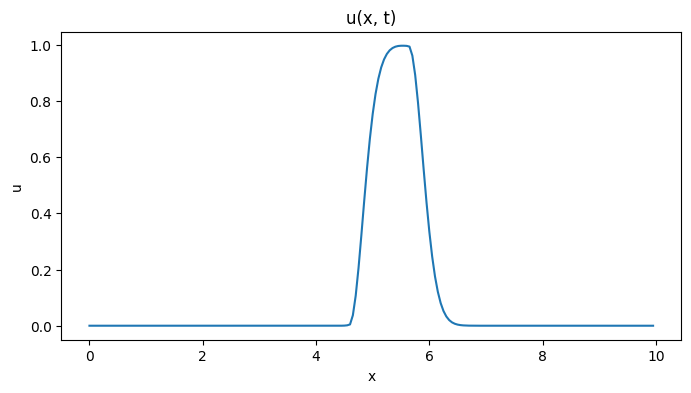

In [15]:
l = 4

def f(u_h_t, h, t):
    const_1 = -(c * t) / h 
    for j in range(len(u_h_t) - 1):
        for i in range(len(u_h_t[j]) - 1):
            y = 1 if abs(u_h_t[j, i - 1] - 2*u_h_t[j, i] + u_h_t[j, i + 1]) <= l*abs(u_h_t[j, i] - u_h_t[j, i - 1]) else 0
            const_2 = -((c * y) / 2) * (t/h - (t*t)/(h*h))
        
            u_h_t[j + 1, i] = u_h_t[j, i] + const_1*(u_h_t[j, i] - u_h_t[j, i - 1]) + const_2*(u_h_t[j, i - 1] - 2*u_h_t[j, i] + u_h_t[j, i + 1])

func(f, 200, 500)

## [TVD схема](https://intuit.ru/studies/courses/1170/213/lecture/5497?page=3)

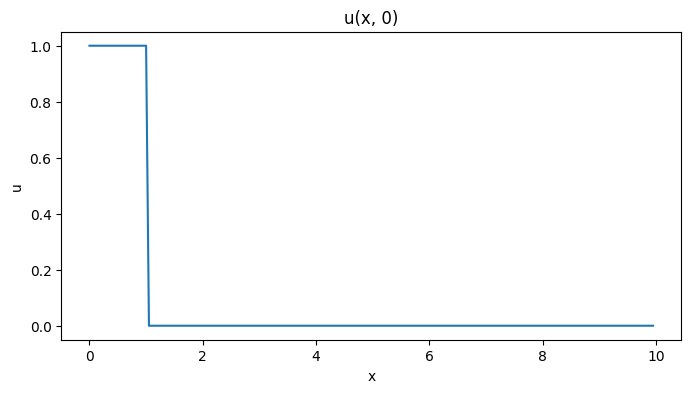

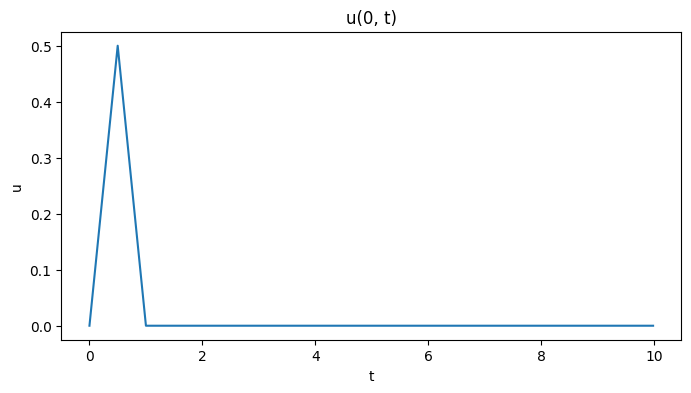

[[ 1.00000000e+000  1.00000000e+000  1.00000000e+000 ...  0.00000000e+000
   0.00000000e+000  0.00000000e+000]
 [ 9.92000000e-001  1.00000000e+000  1.00000000e+000 ...  0.00000000e+000
   0.00000000e+000  0.00000000e+000]
 [ 9.77792000e-001  9.99936000e-001  1.00000000e+000 ...  0.00000000e+000
   0.00000000e+000  0.00000000e+000]
 ...
 [ 3.01848882e-154 -5.63917098e-152  5.91527860e-150 ...  1.04273392e-153
   8.66325055e-156  0.00000000e+000]
 [ 1.81109329e-154 -3.37142863e-152  3.52661047e-150 ...  2.84669306e-153
   2.37278043e-155  0.00000000e+000]
 [ 1.08665597e-154 -2.01561280e-152  2.10248057e-150 ...  7.76277147e-153
   6.49141250e-155  0.00000000e+000]]


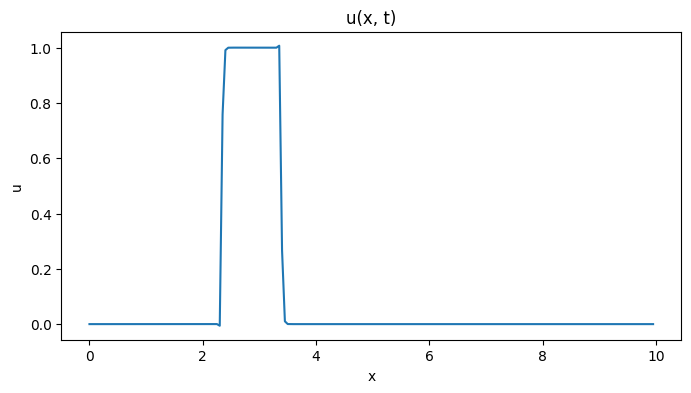

In [37]:
def f(u_h_t, h, t):
    const_1 = c * t
    const_2 = const_1 / h
    for j in range(len(u_h_t) - 1):
        for i in range(len(u_h_t[j]) - 1):
            r_m = (u_h_t[j, i] - u_h_t[j, i - 1]) / (u_h_t[j, i + 1] - u_h_t[j, i]) if (u_h_t[j, i + 1] - u_h_t[j, i]) != 0 else 1e+30
            if r_m > 1:
                phi = min(2, r_m)
            elif 0 < r_m <= 1:
                phi = min(2*r_m, 1)
            else:
                phi = 0

            f_m_plus = phi*const_2*(1 - const_1)*(u_h_t[j, i + 1] - u_h_t[j, i])
            f_m_minus = phi*(const_2/2)*(1 - const_1)*(u_h_t[j, i] - u_h_t[j, i - 1])
            
            u_h_t[j + 1, i] = u_h_t[j, i] - const_2 * (u_h_t[j, i] - u_h_t[j, i - 1]) - (f_m_plus - f_m_minus)

func(f, 200, 500)